## TASK 6.6 - Sourcing  & Analyzing Time Series Data
### 1. Importing libraries & files.
### 2. Make a subset of your data set if necessary. 
### 3. Create a line chart of your data.
### 4. Decompose the data’s components.
### 5. Analyze the results from the plot.
### 6. Conduct a Dickey-Fuller test to check for stationarity.
### 7. Interpret the results and reference your null hypothesis.
### 8. If your data isn’t stationary, conduct a round of differencing on it and repeat Dickey-Fuller test.
### 9. If your data still isn’t stationary, perform another round of differencing and repeat Dickey-Fuller test.
### 10. Check your data’s autocorrelations.

## 1. Importing libraries & files.

In [1]:
# Import libraries
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
# Create string of location
path = '/Users/aegarcia/Desktop/Data analytics/6. Adv Analytics & Dasboard design'
# Import the file with the time series ans the one with the simple moving avergage 
df_time = pd.read_csv(os.path.join(path, '2 Data', 'Original data', 'time_series.csv'), index_col = False)
df_sma = pd.read_csv(os.path.join(path, '2 Data', 'Original data', 'time_series_sma.csv'), index_col = False)

In [3]:
quandl.ApiConfig.api_key = 'fhpFSggxzGZ6Pv6G7ca6'

## 2. Make a subset of your data set if necessary. 

In [4]:
df_time.head()

,date,accidents,vehicles,people,fatalities
0,1-Jan-20,89,128,191,97
1,2-Jan-20,81,135,199,86
2,3-Jan-20,94,143,201,102
3,4-Jan-20,76,111,178,81
4,5-Jan-20,69,106,156,78


In [5]:
df_time.shape

(366, 5)

In [6]:
df_time.columns

Index(['date', 'accidents', 'vehicles', 'people', 'fatalities'], dtype='object')

In [7]:
# Create a subset of the date and data of accidents per day
sub_acc = df_time[['date', 'accidents']]
sub_sma_acc = df_sma[['date', 'sma_acc']]

In [8]:
# Setting datetime as the index
from datetime import datetime

sub_acc['datetime'] = pd.to_datetime(sub_acc['date']) 
sub_acc = sub_acc.set_index('datetime') 
sub_acc.drop(['date'], axis=1, inplace=True)
sub_acc.head()

,accidents
datetime,
2020-01-01,89
2020-01-02,81
2020-01-03,94
2020-01-04,76
2020-01-05,69


### I am using daily data during the entire year (2020).  I am using the number of accidents per day.

## 3. Create a line chart of your data.

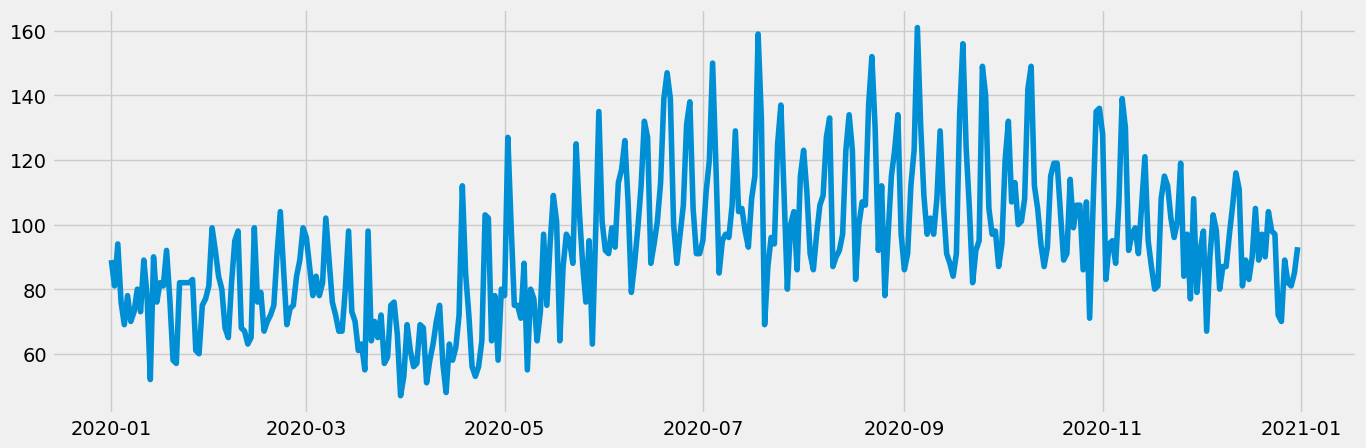

In [9]:
# Plot the data
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(sub_acc)

### There is too much noise, I will take use a simple moving average

In [10]:
# Setting datetime as the index
from datetime import datetime

sub_sma_acc['datetime'] = pd.to_datetime(sub_sma_acc['date']) 
sub_sma_acc = sub_sma_acc.set_index('datetime') 
sub_sma_acc.drop(['date'], axis=1, inplace=True)
sub_sma_acc.head()

,sma_acc
datetime,
2020-01-29,76.633333
2020-01-30,76.366667
2020-01-31,76.966667
2020-02-01,76.900000
2020-02-02,77.166667


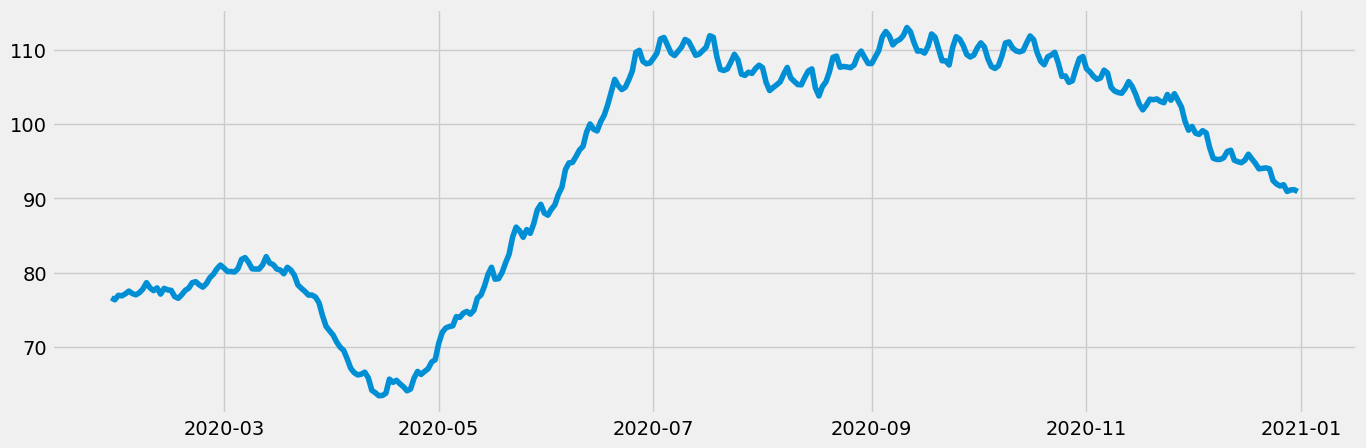

In [11]:
# Plot data
plt.figure(figsize=(15,5), dpi=100) 
plt.plot(sub_sma_acc)

### Looks smoother than before!

## 4. Decompose the data’s components.

In [12]:
# Look for nans
sub_sma_acc.isnull().sum()

sma_acc    0
dtype: int64

In [13]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(sub_sma_acc, model='additive')

In [14]:
from pylab import rcParams # This will define a fixed size for all special charts.
rcParams['figure.figsize'] = 25, 7

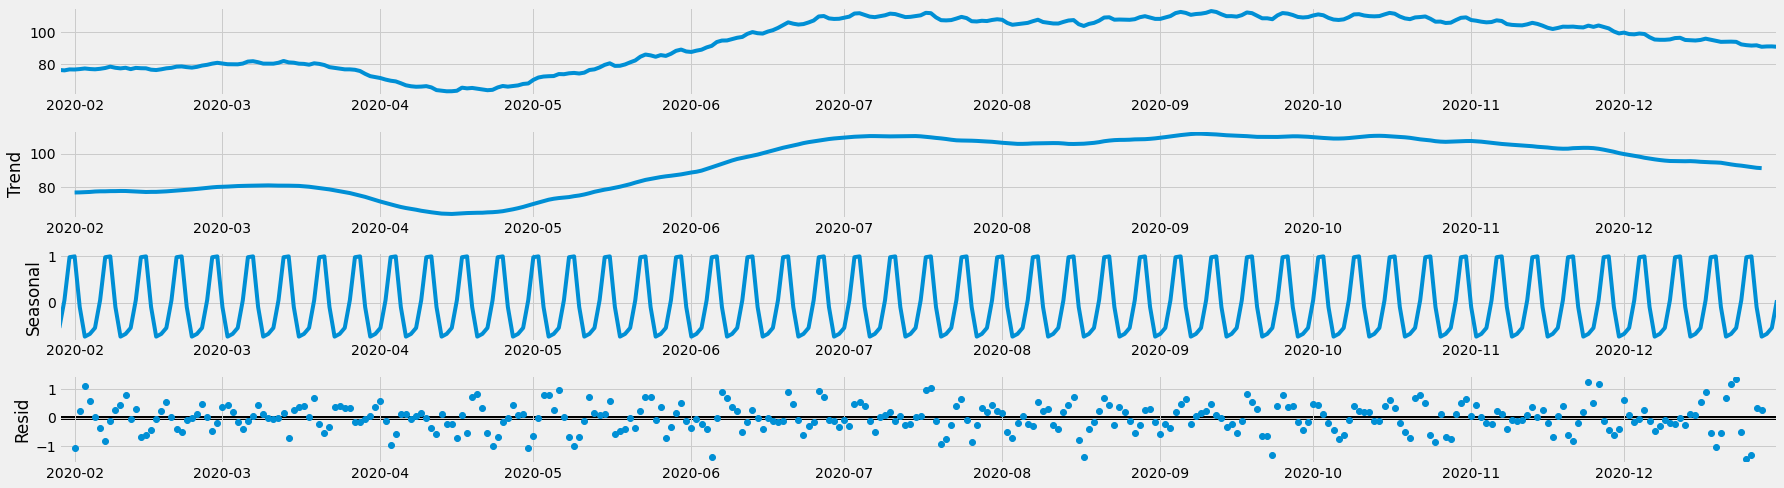

In [15]:
# Plot the separate components
decomposition.plot()
plt.show()

## 5. Analyze the results from the plot.

### It seems that there is still too much noise even after calculating a simple moving average. 
### The trend still looks like there is a dip on accidents during the month of April, then this number goes up during May - July and then the number stay almost constant, slightly down.

## 6. Conduct a Dickey-Fuller test to check for stationarity.

In [16]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)
# Apply the test using the function on the time series
dickey_fuller(sub_sma_acc)

Dickey-Fuller Stationarity test:
Test Statistic                  -2.155393
p-value                          0.222831
Number of Lags Used             14.000000
Number of Observations Used    323.000000
Critical Value (1%)             -3.450759
Critical Value (5%)             -2.870530
Critical Value (10%)            -2.571560
dtype: float64


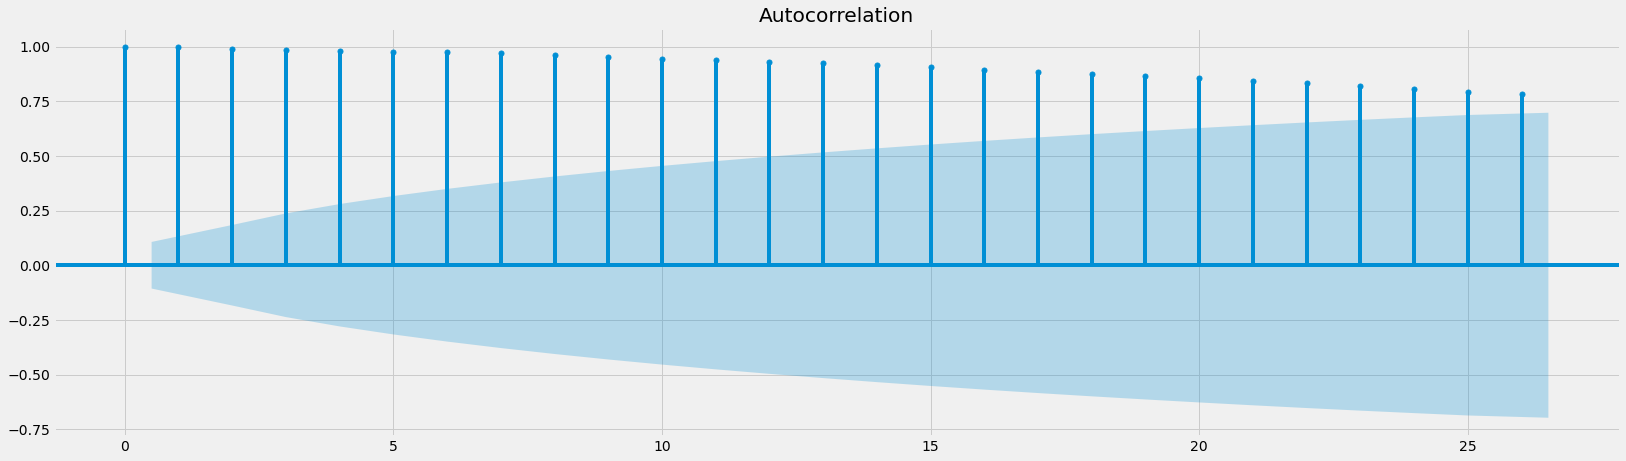

In [17]:
# Check out a plot of autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(sub_sma_acc)
plt.show()

## 7. Interpret the results and reference your null hypothesis.

### Ho: There is a unit root
### Ha: There is not a unit root
### Using a confidence level of 5%, (T.S) -2.15 > -2.87 (CV) therefore we Fail to Reject the Null Hypothesis. We could say there is a unit root, therfore our data is NON-stationary. So we need to continue with Stationarizing. 

## 8. If your data isn’t stationary, conduct a round of differencing on it and repeat Dickey-Fuller test.

In [18]:
# Use function t - (t - 1)
data_diff = sub_sma_acc - sub_sma_acc.shift(1)

In [19]:
data_diff.dropna(inplace = True)

In [20]:
data_diff.head()

,sma_acc
datetime,
2020-01-30,-0.266667
2020-01-31,0.600000
2020-02-01,-0.066667
2020-02-02,0.266667
2020-02-03,0.366667


In [21]:
data_diff.columns

Index(['sma_acc'], dtype='object')

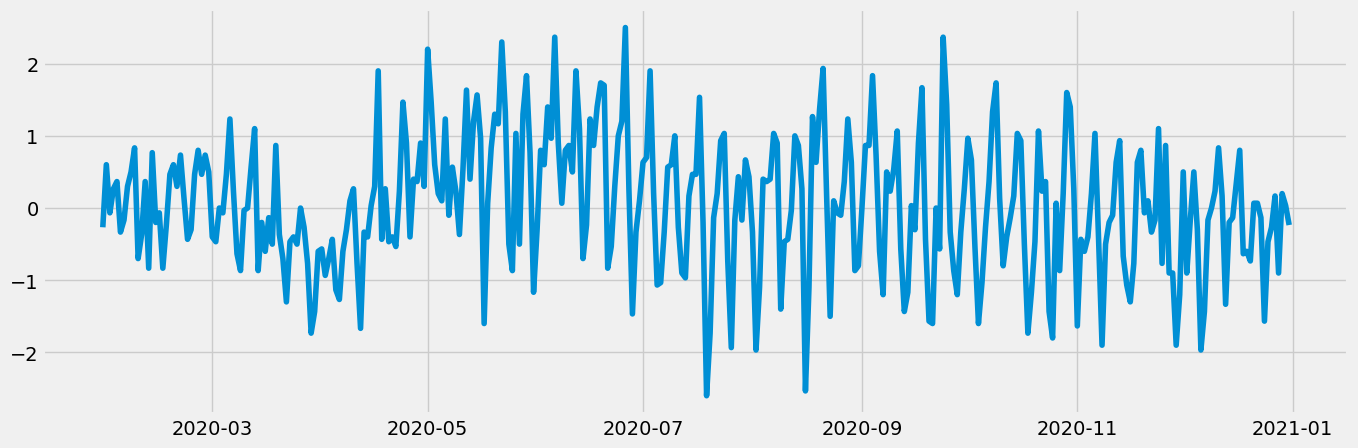

In [22]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [23]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.870677
p-value                          0.345979
Number of Lags Used             13.000000
Number of Observations Used    323.000000
Critical Value (1%)             -3.450759
Critical Value (5%)             -2.870530
Critical Value (10%)            -2.571560
dtype: float64


## Ho: There is a unit root
## Ha: There is not a unit root
### At a confidence Level of 5%: (TS) -1.87 > -2.87 (CV) therefore we Fail to Reject the Null Hypothesis again. The data is non-stationary still.

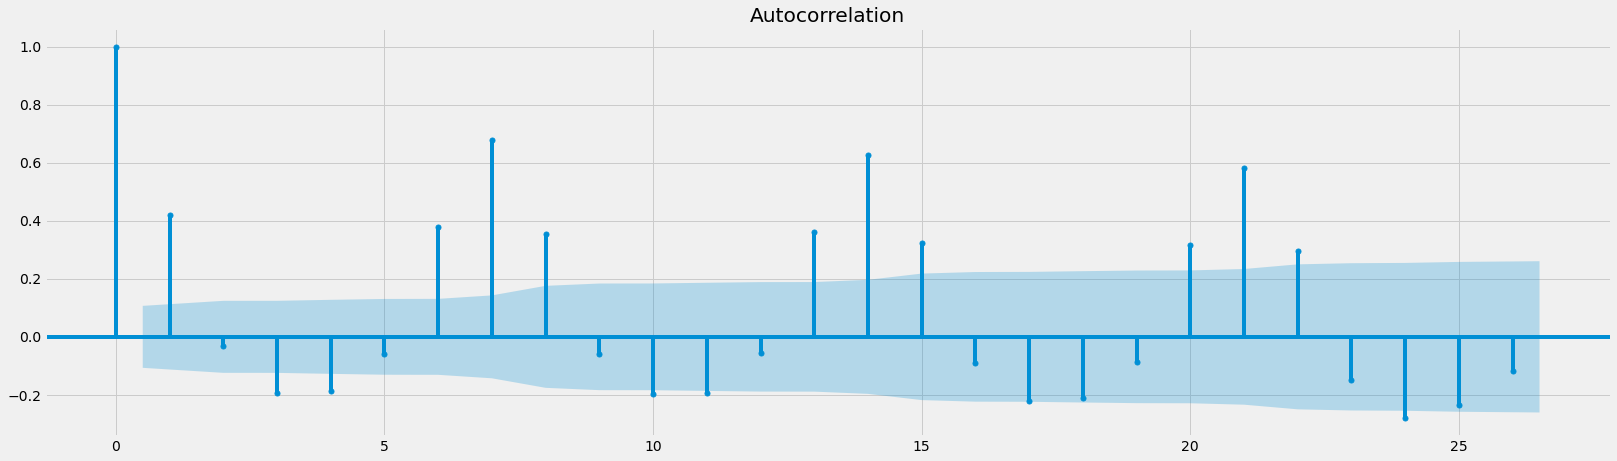

In [24]:
plot_acf(data_diff)
plt.show()

## 9. If your data still isn’t stationary, perform another round of differencing and repeat Dickey-Fuller test.

In [25]:
# Use function t - (t - 1)
data_diff2 = sub_sma_acc.shift(1) - sub_sma_acc.shift(2)

In [26]:
data_diff2.dropna(inplace = True)

In [27]:
data_diff2.head()

,sma_acc
datetime,
2020-01-31,-0.266667
2020-02-01,0.600000
2020-02-02,-0.066667
2020-02-03,0.266667
2020-02-04,0.366667


In [28]:
data_diff2.columns

Index(['sma_acc'], dtype='object')

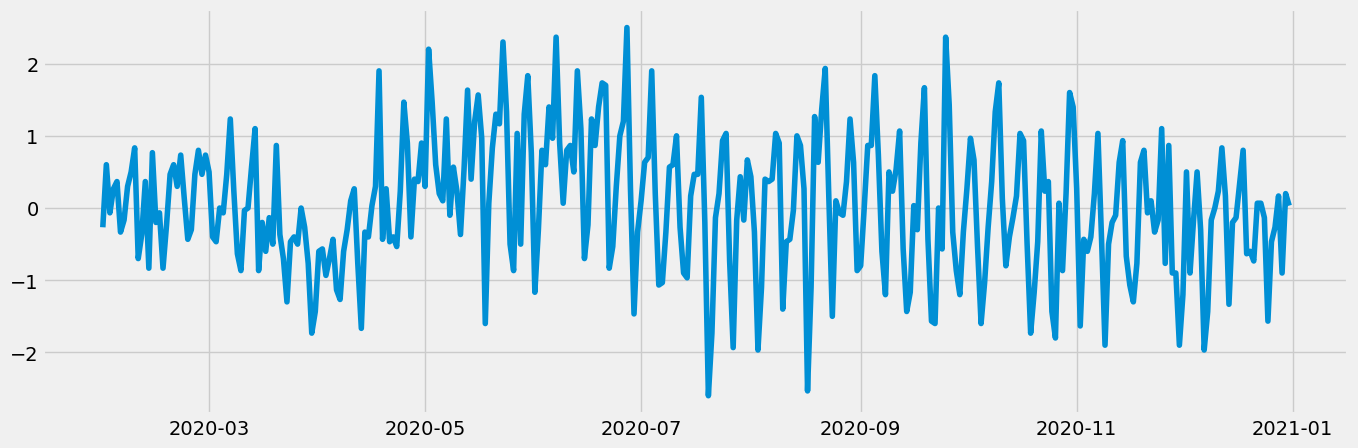

In [29]:
# Check out what the differencing did to the time-series curve
plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff2)

In [30]:
dickey_fuller(data_diff2)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.853680
p-value                          0.354155
Number of Lags Used             13.000000
Number of Observations Used    322.000000
Critical Value (1%)             -3.450823
Critical Value (5%)             -2.870558
Critical Value (10%)            -2.571575
dtype: float64


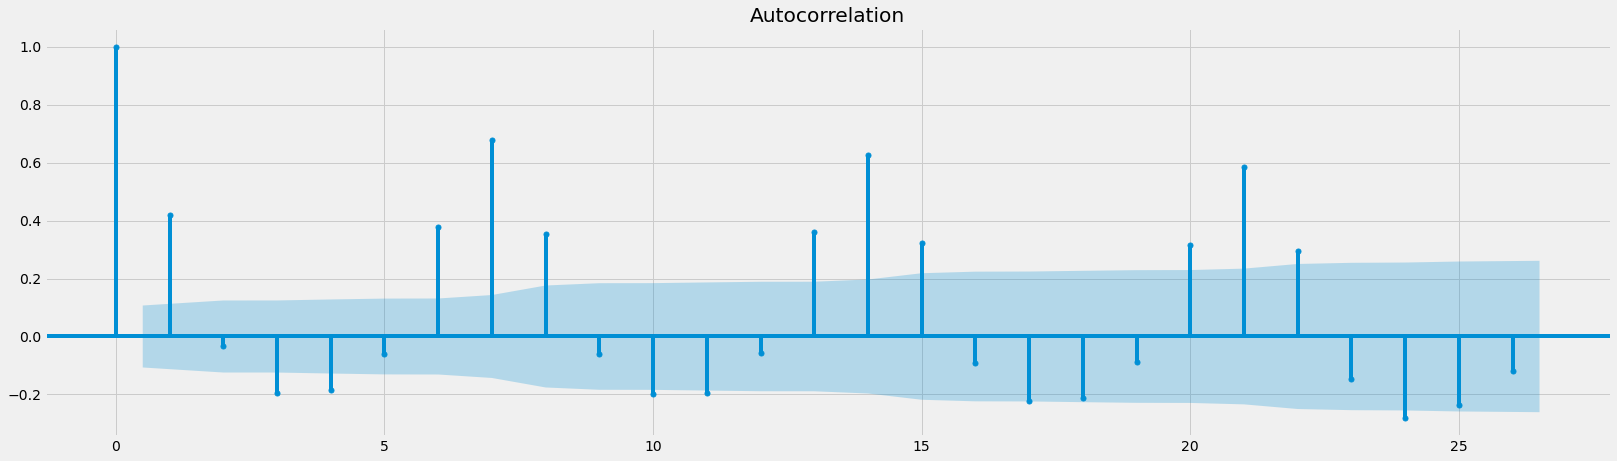

In [31]:
plot_acf(data_diff2)
plt.show()

## 10. Check your data’s autocorrelations.

### The number of lags (vertical lines) outside of the Confidence Interval seems to decrease each time we perfom a differencing round to the data, but the time series graph looks worse. 